In [5]:
#import libraries
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
import torch

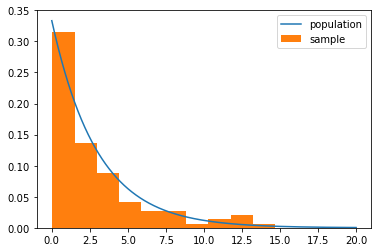

In [2]:
#simple and visual case to get started.
population_rate = 3
sample_size = 100

get_sample = lambda n: np.random.exponential(population_rate, n)
xs = np.arange(0, 20, 0.001)
ys = expon.pdf(xs, scale=population_rate)
plt.plot(xs, ys, label='population')

sample = get_sample(sample_size)
plt.hist(sample, density=True, label='sample')

plt.legend()
plt.show()

parameter value:  2.9400000000000017


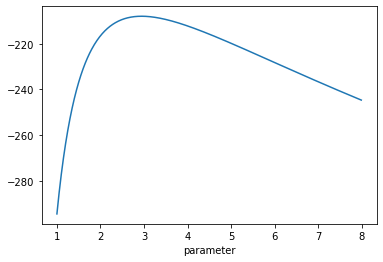

In [11]:

log_likelihood = lambda rate: sum([np.log(expon.pdf(v, scale=rate)) for v in sample])

rates = np.arange(1, 8, 0.01)
estimates = [log_likelihood(r) for r in rates]

plt.xlabel('parameter')
plt.plot(rates, estimates)
print('parameter value: ', rates[estimates.index(max(estimates))])

In [14]:
sample = torch.tensor(sample, requires_grad = True)
sample = sample.detach().numpy()
log_likelihood = lambda rate: sum([np.log(expon.pdf(v, scale=rate)) for v in sample])

rates = np.arange(1, 8, 0.01)
estimates = [log_likelihood(r) for r in rates]
estimates = torch.tensor(estimates, requires_grad = True)
estimates.backward()
sample.grad

RuntimeError: grad can be implicitly created only for scalar outputs

In [9]:
#Stochastic gradient descend implementation
